# Lab 12 — GMT Part 1
---

## Introduction
Today's lab will cover some of the introductory PyGMT [Py Generic Mapping Tools (PyGMT)](https://www.pygmt.org/dev/overview.html) discussed in lecture. You will start with a sample script for a map of Alaska, make simple maps for your research area, and then move on to adding data to maps.

PyGMT has a fairly steep learning curve because of the vast number of options available to you to control figures. PyGMT is derived from GMT, which is a command line tool for building maps. Luckily, PyGMT is much easier to work with because it has Python's forgiving syntax rules (no errors because there is an extra space somewhere!). 

## Helpful resources
To get started I would recommend reading through [Making your first Figure](https://www.pygmt.org/dev/tutorials/first_figure.html). This shows you how easy it can be to make a simple figure. To make more complex figures you will want to start by creating a simple version of what you want, and then tweaking the figure and adding features little by little until you have the final product you want. 

Because of the large number of options available in PyGMT, it is a good idea to get familiar with the [PyGMT documentation](https://www.pygmt.org/dev/api/index.html). Here you can find all of the objects that PyGMT can create, all of the functions you can use on those objects, and all of the arguments that those functions need to run properly.
If you aren't sure exactly what you need, taking a look in the [PyGMT Gallery](https://www.pygmt.org/dev/gallery/index.html) might give you a good starting point and some example code. 

## Deliverables
Your deliverable for this lab will be this notebook, with "deliverables" completed as requested below. The "exercises" are exploratory and not graded. Please rename the notebook from lab_12_pygmt.ipynb to <last_name>_lab_12_pygmt.ipynb prior to submission. Download the file using File  →  Download .ipynb. Submit it to Canvas under the Lab 12 assignment no later than **midnight Thursday, December 2nd.** Yes, you have two weeks to complete this assignment, happy Thanksgiving!

## Downloading PyGMT
Installing PyGMT with the normal "pip install pygmt" command will not work here! In order to get it working you will have to run installation commands from a terminal directly.
1. Start by opening a new terminal from the home page with **new>terminal**
2. Run the command `conda create --name pygmt --channel conda-forge pygmt`.
3. This command will take a minute or so, and then ask you "Proceed ([y]/n)?" – here you need to press `y` and then hit `ENTER` in order to proceed with the installation. After another few minutes your new environment will be created and ready to activate.
4. Next, run the command `conda activate pygmt`. This should slightly change the appearance of your terminal newline from: <br> "(base) jovyan@jupyter-username:"  to   "(pygmt) jovyan@jupyter-username:"
5. Now, while your new environment is activated run the command `pip install --user ipykernel`. This will install some new packages that allow you to add this environment as a new juypter notebooks kernel.
6. Next, run the command `python -m ipykernel install --user --name=pygmt` The output you see should be: <br> 
Installed kernelspec pygmt in /home/jovyan/.local/share/jupyter/kernels/pygmt
7. To check that this worked, run the command `jupyter kernelspec list`. This should now show two available kernels: pygmt and python3. 

8. Now we are done with the terminal session, you can close the terminal window. From this Notebook, click on **Kernel>Shutdown** , and click shutdown again when it asks you. Now close and re-open this Notebook.
9. Welcome back, in order to get the new pygmt kernel running you should now have the options **Kernel>Change Kernel>Python[conda env:.local-pygmt]**

10. Everything should be installed now, and you should be able to import the pygmt library!

## Exercise 1: Sample GMT scripting

For this first section, review the code cell below which generates a map of Alaska, including shaded relief 
as well as national boundaries. As a starting point, look through the script and run it once to see 
what the generated output looks like. Then comment out various lines in the script to explore what 
the various commands do.

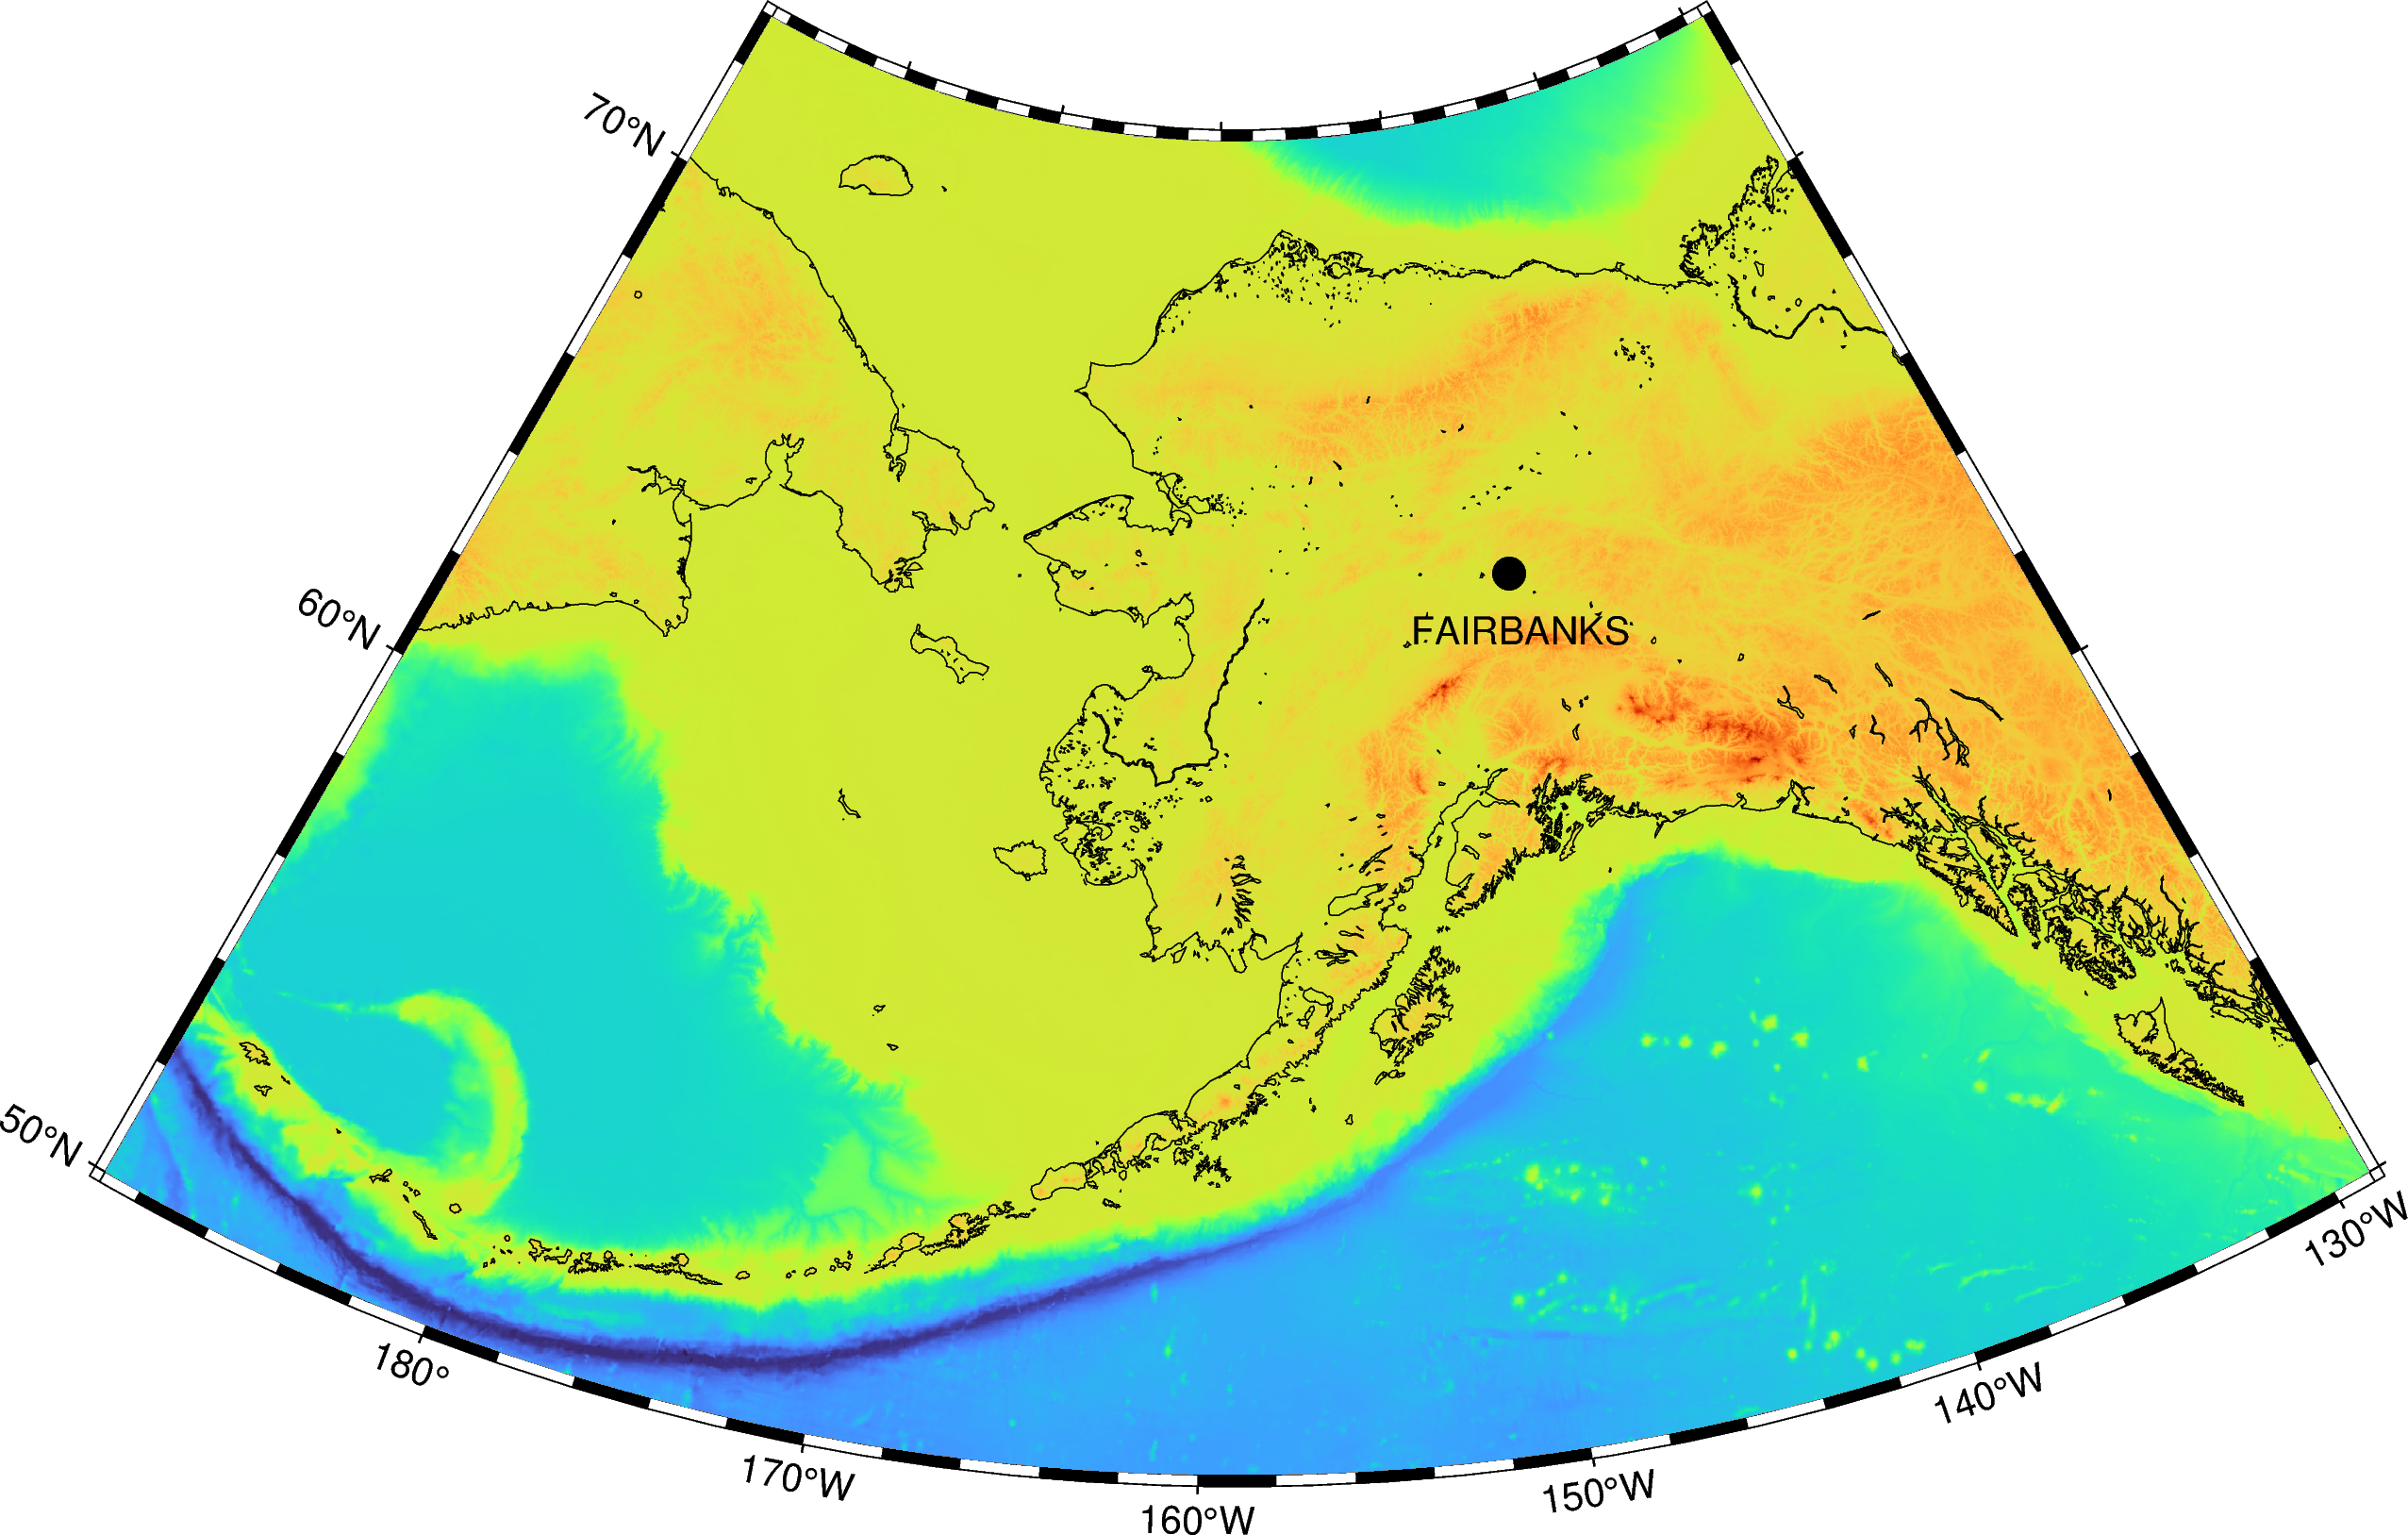

In [1]:
import pygmt

FBX_LON=-147.7164
FBX_LAT=64.8378

load_grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[171,231,50,73])
fig = pygmt.Figure()
fig.basemap(frame=True, region=[171,231,50,73], projection='S201/90/8i')
fig.grdimage(grid=load_grid)
fig.coast(shorelines=True)
fig.plot(x=FBX_LON, y=FBX_LAT, style="c0.3c", color="black")
fig.text(x=FBX_LON, y=FBX_LAT-1, text="FAIRBANKS")

fig.show()

## Deliverable 1: Test of example script — explore the options
Now modify the script to create a map of Alaska with:
* national boundaries as red lines
* a different colormap for the shaded relief
* Fairbanks marked with a red square
*BONUS: add a 400km scalebar (+5)

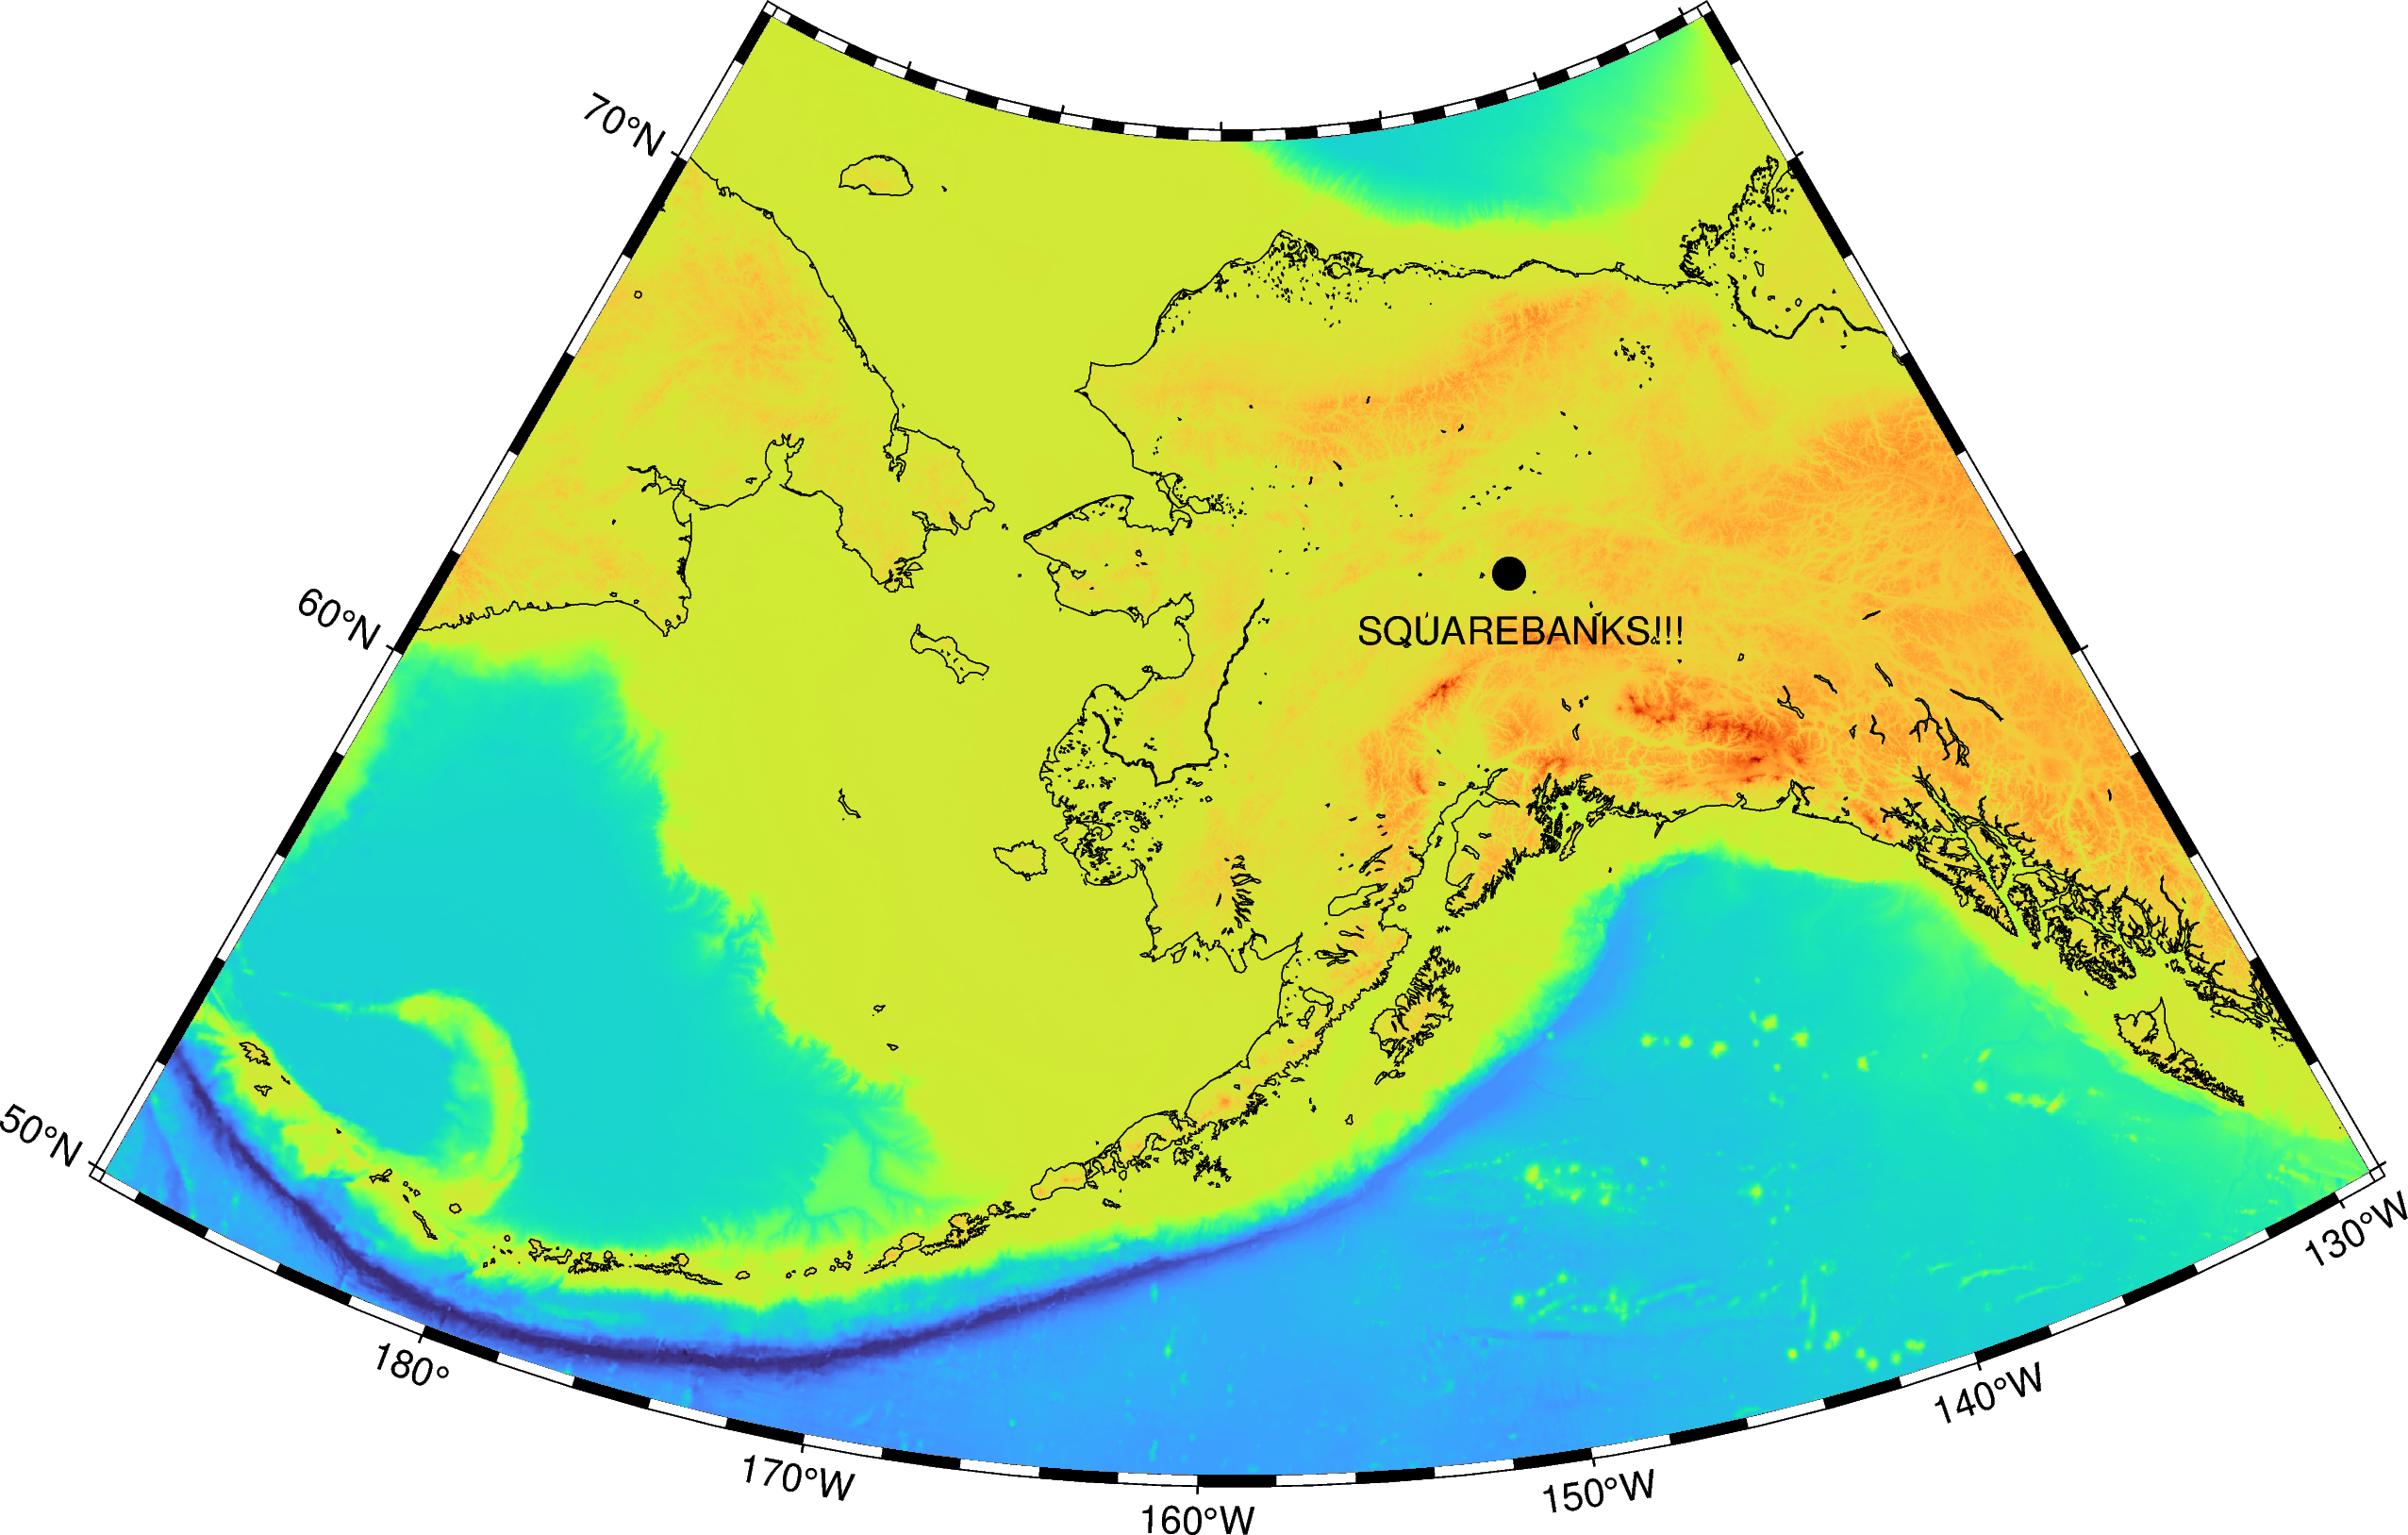

In [2]:
FBX_LON=-147.7164
FBX_LAT=64.8378

load_grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[171,231,50,73])
fig = pygmt.Figure()
fig.basemap(frame=True, region=[171,231,50,73], projection='S201/90/8i')
fig.grdimage(grid=load_grid)
fig.coast(shorelines=True)
fig.plot(x=FBX_LON, y=FBX_LAT, style="c0.3c", color="black")
fig.text(x=FBX_LON, y=FBX_LAT-1, text="SQUAREBANKS!!!")

fig.show()

## Deliverable 2: Regional map of research area

Create a map of the continent (e.g., North America) where your research area (or another spot if you are doing some sort of theoretical study) is located. Use a [Lambert Azimuthal Equal Area projection](https://www.pygmt.org/v0.3.0/projections/azim/azim_lambert.html#sphx-glr-projections-azim-azim-lambert-py) color land masses light brown, water white, any state/country borders in green, and include a map scale in the bottom right corner. Add latitude and longitude lines at a reasonable interval.

## Deliverable 3: Close-up of research area

Create a map of your research area (or some other spot if you are doing some sort of theoretical study). Use a [Mercator projection](https://docs.generic-mapping-tools.org/6.0/cookbook/map_projections.html#mercator-projection-jm-jm), color land masses light brown, water blue, any state/country borders in green, and include a map scale in the bottom right corner. Set the latitude and longitude tickmarks at a reasonable range and interval for your region and display them on the west and south portions of the map.

## Deliverable 4: Map of Alaska seismicity

Now that you are experts in creating simple maps, you will now gain experience adding additional information to them. The ability to add additional data to the plots is incredibly useful — you can think about this as layering more and more information to the underlying basemap that you already created. Examples of additional data layers include geographic locations of sample locations, stations, volcanoes, faults, etc.

We'll explore more complex plotting next week by adding in a wide range of data, but for this week, you'll work with a simple map, adding in locations of earthquakes. We've a provided a data file for use here, and we provide some help, but reading the documentation will be essential.

We'll be using data from `query.csv` that is in the `lab_12` folder. To extract the earthquakes that are within a certain lat-lon box, you can use `awk` again, expanding on our usage from lab 10:

```
awk -F, 'NR>1 {print $3, $2, $4, $5}' query.csv > ak_eqs.xy
```
OR, you can read the file directly into python with pandas and select rows using the .loc function:
```
import pandas as pd
eqs = pd.read_csv(query.csv)
eqs = eqs.loc[ ... ]
```



First, use [`makecpt`](https://www.pygmt.org/dev/api/generated/pygmt.makecpt.html) to make a color palette based on the earthquake depth data. It may be helpful to review a tutorial similar to this task [`here`](https://www.pygmt.org/dev/tutorials/plot.html#sphx-glr-tutorials-plot-py)

Plot the [coast](https://www.pygmt.org/dev/api/generated/pygmt.Figure.coast.html), color the land white, and the ocean light blue. Set the latitude and longitude ticks to plot every 2.5 degrees and annotate every 5 degrees. Create a [stereographic](https://www.pygmt.org/dev/projections/azim/azim_general_stereographic.html#sphx-glr-projections-azim-azim-general-stereographic-py) projection map of earthquakes located in southern Alaska in the region:

```
min_lat=50
max_lat=65
min_lon=-170
max_lon=-125
```

Now use [`plot`](https://www.pygmt.org/dev/api/generated/pygmt.Figure.plot.html) to plot the earthquakes as circles that have a color that changes with depth, pick a size that results in a legible map. Bonus: use the appropriate kewyword argument to scale the circles by their magnitude.

Include a [colorbar](https://www.pygmt.org/dev/api/generated/pygmt.Figure.colorbar.html) representing the depth scale.